# Day 3: Python Crash Course (3/3)

## Functional programming

### Lambda expressions and function handles
* ```Lambda expressions``` are aka [anonymous functions](https://en.wikipedia.org/wiki/Anonymous_function) (also see [lambda calculus](https://en.wikipedia.org/wiki/Lambda_calculus)).
* Syntax:

```python
function_handle = lambda input_var: function body
```

* ```Function handles``` are variables which are references to functions! (Why?)
    * Higher-order functions: [functools](https://docs.python.org/3/library/functools.html) (higher-order functions and operations on callable objects)

In [1]:
f = lambda x : x ** 2 + 1
print("f(10) =", f(10))

f(10) = 101


### Mapping

In [2]:
languages = ["python", "perl", "java", "c++"]

# for-in loop
lens = []
for each_item in languages:
    lens.append(len(each_item))
print(lens)

# comprehension
lens2 = [len(each_item) for each_item in languages]    
print(lens2)

# map
print(list(map(len, languages)))

[6, 4, 4, 3]
[6, 4, 4, 3]
[6, 4, 4, 3]


### Filtering

In [3]:
fibs = [1, 1, 2, 3, 5, 8, 13, 21, 34]

def is_even(x):
    return x % 2 == 0

print(list(filter(is_even, fibs)))
print(list(filter(lambda x : x % 2 == 0, fibs)))

[2, 8, 34]
[2, 8, 34]


#### Exercise 1: [4, 1]

In [4]:
q1 = [[1, 3], [4, 2, -5]]
print(list(map(sum, q1)))

[4, 1]


#### Exercise 2: ['1', 'True', '[2, 3]']

In [5]:
q2 = [1, True, [2, 3]]
print(list(map(str, q2)))

['1', 'True', '[2, 3]']


#### Exercise 3: [1, 6, 1, 7]

In [6]:
q3 = [0, 1, 0, 6, 'A', 1, 0, 7] 
print(list(filter(lambda x: x != 0 and x != "A", q3)))

[1, 6, 1, 7]


### Iterators
* Represent finite or infinite data streams, without storing all the elements at a time (space-saving).
* Two main APIs:
    * iter(iterable): to create an iterator
    * next(): to get the next value 
* Note that the for loop gets values by calling next() implicitly!

In [7]:
stock_pool = [2330, 2891]
iterator_of_stock_pool = iter(stock_pool)
print(next(iterator_of_stock_pool))
print(next(iterator_of_stock_pool))
# print(next(iterator_of_stock_pool)) # raise StopIteration Error 

2330
2891


### Generators
* Generators are resumable functions, which use the keyword ``yield`` inside.
* A generator is just a special type of iterators.
* Like iterators, we can get the next value from a generator using next().
* Reference:
    * Improve your python: yield and generators explained: https://jeffknupp.com/blog/2013/04/07/improve-your-python-yield-and-generators-explained/



In [8]:
def integer_generator(n):
    for i in range(n):
        yield i

generator10 = integer_generator(10)
print("Before loop, the first two numbers are", next(generator10), next(generator10))
print("In the loop,", end = " ")
for n in generator10:
    print(n, end = " ")

Before loop, the first two numbers are 0 1
In the loop, 2 3 4 5 6 7 8 9 

#### Exercise: a simple price generator
* See [Black–Scholes model](https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model) in Wikipedia.
* In particular, Black and Scholes assume that the return of underlying asset follows a Brownian motion: $$\dfrac{dS}{S} = r dt + \sigma dW,$$ where $S$ is the price of underlying asset, $r$ is the annunal risk-free interest rate, $\sigma$ is the annual volatility, and $dW$ is a Wiener process following a standard normal distribution.
* To simulate a price path, we discretize the equation by finite difference, that is, $$\dfrac{dS}{S} \sim \dfrac{S_{i + 1} - S_{i}}{S_i} = r \Delta t + \sigma \sqrt{\Delta t} W_i$$ where $\Delta t = \frac{1}{252}$ and $W_i$ can be generated by numpy.random.randn().
* So we can calculate the price $S_{i + 1}$ by $$S_{i + 1} = S_{i} (1 + r \Delta t + \sigma \sqrt{\Delta t} W_i).$$

In [9]:
def price_generator(s0, N, r = 0.01, v = 0.25):
    
    import numpy as np
    import math

    dt = 1 / 252
    
    for i in range(N):
        s0 = s0 * (1 + r * dt + v * math.sqrt(dt) * np.random.randn()) 
        yield s0

In [10]:
print(list(price_generator(230, 5)))

[225.6557121163845, 218.9833292511835, 222.93124282354876, 224.8498470083995, 221.30940676945355]


In [11]:
import matplotlib.pyplot as plt

stock_2330 = list(price_generator(230, 252))
plt.plot(stock_2330)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


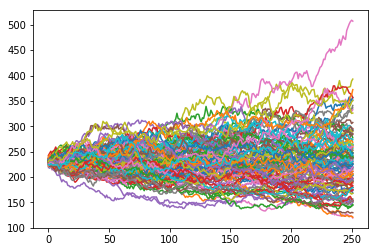

In [12]:
import matplotlib.pyplot as plt

plt.figure()
for _ in range(100):
    stock_2330 = list(price_generator(230, 252))
    plt.plot(stock_2330)
    plt.hold(True)
plt.show()

## Object-oriented programming (OOP)
* ``Everything is an object.``

### Class and object

> A ``class`` is an extensible program-code-template for creating ``objects``, providing initial values for state (aka ``attributes`` or fields) and implementations of behavior (aka ``methods``).

<img src = "https://i.ytimg.com/vi/kj5fV4Ibb2w/maxresdefault.jpg" width = 400px>

* Requirements in OOP: ``encapsulation`` (not good in python), ``inheritance``, and ``polymorphism``.
    * More about OOP: https://en.wikipedia.org/wiki/Object-oriented_programming
* In python, everything is an object and all kinds of objects are inherited from ``object``.
    * By inheritance, every object has common methods, aka ``magic methods``.
    * You could find all magic methods here: https://docs.python.org/3/reference/datamodel.html#basic-customization

In [13]:
class Complex:
    
    '''
    attributes: class member (one copy; shared)
    '''
    count = 0
    
    '''
    constructor
    '''
    def __init__(self, real = 0, imag = 0):
        
        Complex.count += 1 # equivalent to count = count + 1        
        
        '''attributes: instance/data members'''
        self.real = real
        self.imag = imag
        
    # override the method __repr__ inherited from object
    def __repr__(self):
        return str(self.real) + ", " + str(self.imag)
        
    # override the method __add__ inherited from object
    def __add__(self, other):
        return Complex(self.real + other.real, self.imag + other.imag)

In [14]:
c1 = Complex(1, 2)
c2 = Complex(3, 4)

c3 = c1 + c2
print(c3)

4, 6


In [15]:
print(Complex.count)
c1 = Complex(10, 20)
print(Complex.count)
c2 = Complex(10, -20)
print(Complex.count)

3
4
5


In [16]:
print("c1 = ({}, {})".format(c1.real, c1.imag))
print("c2 = ({}, {})".format(c2.real, c2.imag))

# a more concise way
print("c1 = {}".format(c1))
print("c2 = {}".format(c2))

c1 = (10, 20)
c2 = (10, -20)
c1 = 10, 20
c2 = 10, -20


In [17]:
print("c3 = c1 + c2 = {}".format(c1 + c2))

c3 = c1 + c2 = 20, 0


#### Exercise: Vector

In [18]:
class Vector:
    
    def __init__(self, x = 0, y = 0, z = 0):
        self.x = x
        self.y = y
        self.z = z

    def length(self):
        return (self.x ** 2 + self.y ** 2 + self.z ** 2) ** 0.5

In [19]:
v1 = Vector(1, 2, 3)
print(v1.length())

3.7416573867739413


### Memory
* Check the [memory layout of a process](https://gabrieletolomei.wordpress.com/miscellanea/operating-systems/in-memory-layout/):
![](https://gabrieletolomei.files.wordpress.com/2013/10/program_in_memory2.png)
* In python, a variable is so-called a reference (like a pointer in C/C++), which is stored in the stack and points to an object in the heap.
* You could refer to a detailed and comprehensive reading material for the truth under the hood of python: Nina Zakharenko, https://www.slideshare.net/nnja/memory-management-in-python-the-basics, 2016.5.30

In [20]:
import sys

print(sys.getsizeof(1)) # unit: byte
print(isinstance(1, object)) # Numeric values are objects!!!

28
True


### id: the identification of objects

In [21]:
help(id)

print("id(1) = {}".format(id(1)))
print("id(list) = {}".format(id(list)))
print("id(id) = {}".format(id(id)))

isinstance(id, object) # Even functions are objects!!!!

Help on built-in function id in module builtins:

id(obj, /)
    Return the identity of an object.
    
    This is guaranteed to be unique among simultaneously existing objects.
    (CPython uses the object's memory address.)

id(1) = 1390767168
id(list) = 1390318832
id(id) = 4619216


True

### Application: exception and exception handling
* Why exception/error object?
* Keywords: try-except-else-finally.
* As a lib provider, you may ``raise`` an exception to stop the client from disallowable actions
* You could customize errors by ``inheriting`` the class Error.

In [22]:
x = input("Enter a number? ")
x = x + 1
print("End of program.")

Enter a number? 5


TypeError: must be str, not int

In [23]:
x = input("Enter a number? ")

try:
    x = x + 1
except TypeError:
    print(TypeError)
print("End of program.")

Enter a number? 10
<class 'TypeError'>
End of program.


In [24]:
try:
    x = x + 1
except TypeError:
    print(TypeError)
except NameError:
    pass # handler

<class 'TypeError'>


In [25]:
try:
    x = x + 1
except TypeError:
    print(TypeError)
except NameError: # could put more error types below
    pass
except:
    pass # handler for unexpected errors

<class 'TypeError'>


In [26]:
try:
    x = x + 1
except TypeError:
    print(TypeError)
except NameError:
    pass
except:
    pass
else:
    pass # do these things if no error

<class 'TypeError'>


In [27]:
try:
    x = x + 1
except TypeError:
    print(TypeError)
except NameError:
    pass
except:
    pass
else:
    pass
finally:
    print("End of program.") # always-do; usually as a cleanup!

<class 'TypeError'>
End of program.


In [28]:
def div(x, y):
    return x / y

In [29]:
print(div(1, 0))

ZeroDivisionError: division by zero

In [30]:
class MyNewError(ZeroDivisionError):
    pass

In [31]:
def div(x, y):
    if y == 0:
        raise MyNewError("You cannot do this?!")
    return x / y

print(div(1, 0))

MyNewError: You cannot do this?!

### Application: String

In [42]:
greeting = "Hello world! "

greeting[4] # => 'o'
'world' in greeting # => True
len(greeting) # => 13

13

In [43]:
greeting.find('lo') # => 3 (-1 if not found)
greeting.replace('llo', 'y') # => "hey world!"
greeting.startswith('hell') # => True
greeting.isalpha() # => False (due to '!')
greeting.lower() # => "hello world! "
greeting.title() # => "Hello World! "
greeting.strip() # => "Hello world!"
greeting.strip('! ') # => "Hello world" (no '!')

'Hello world'

In [44]:
', '.join(['Eric', 'John', 'Michael'])
# => "Eric, John, Michael"
'ham cheese bacon'.split()
# => ['ham', 'cheese', 'bacon']
'02-27-2019'.split(sep = '-')
# => ['02', '27', '2019']

['02', '27', '2019']

In [45]:
print("{:06.2f}".format(3.14159)) # using C-style specifiers

print('{:10}'.format('hi')) # padding is just another specifier
print('{:^12}'.format('TEST'))

captains = ['Kirk', 'Picard'] 
print("{caps[0]} {caps[1]}".format(caps = captains)) # looking up values

003.14
hi        
    TEST    
Kirk Picard


#### String format 2.0
* Also see <a href = "https://realpython.com/python-f-strings/">Python 3's f-Strings: an improved string formatting syntax</a>.

In [46]:
# pro1: curly braces in strings are placeholders
print('{} {}'.format('welcome to', 'python programming in finance'))

# pro2: provide values by position or by placeholder
print("{0} can be {1} {0}".format("strings", "formatted"))
print("{name} loves {food}".format(name = "sam", food = "plums"))

# pro3: Values are converted to strings

welcome to python programming in finance
strings can be formatted strings
sam loves plums


In [47]:
school = "NTU"
department = "CSIE"

# using 3 string objects: wasting time and space
print(school + department)
# format 1.0, c-style: not readable, value duplication, tuple unpacking
print("%s%s" % (school, department)) 
# format 2.0: fastest and most convenient
print("{}{}".format(school, department)) 

NTUCSIE
NTUCSIE
NTUCSIE


### Application: File I/O
* Data set: <a href = "https://www.csie.ntu.edu.tw/~d00922011/python/data/USDJPY.csv">USDJPY.csv</a>
* Using <a href = "https://docs.python.org/3/library/csv.html">csv</a>
* formula: with-as (a good abtraction on exception handling)

In [48]:
import csv

filename = 'USDJPY.csv'
date_list = []
rate_list = []
with open(filename, newline = '') as csv_file:
    reader = csv.reader(csv_file, delimiter = ',')
    for row in reader:
        d, r = tuple(row)
        date_list.append(d)
        rate_list.append(float(r))

print("Last 5 days:", date_list[-5:])
print("Last 5 rates:", rate_list[-5:])
print("Observation dates:", len(date_list))

Last 5 days: ['2018/10/31', '2018/11/1', '2018/11/2', '2018/11/5', '2018/11/6']
Last 5 rates: [113.05, 112.67, 113.2, 113.17, 113.2]
Observation dates: 5217


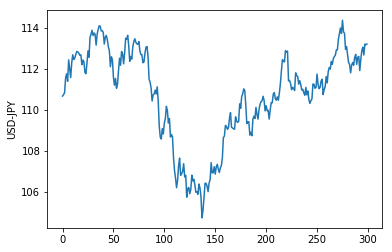

In [49]:
import matplotlib.pyplot as plt
import datetime

plt.plot(rate_list[-300:])
plt.ylabel('USD-JPY')
plt.show()

### Application: Time
* Related packages: ``time``, ``calendar``, ``datetime``
* Also see the following pages:
    * time: https://docs.python.org/3.7/library/time.html
    * calendar: https://docs.python.org/3.7/library/calendar.html
    * datetime: https://docs.python.org/3.7/library/datetime.html.

In [50]:
import time

print(time.time()) # Why?!
print(time.localtime())
print(time.asctime(time.localtime()))

1560840121.7104766
time.struct_time(tm_year=2019, tm_mon=6, tm_mday=18, tm_hour=14, tm_min=42, tm_sec=1, tm_wday=1, tm_yday=169, tm_isdst=0)
Tue Jun 18 14:42:01 2019


In [51]:
time.sleep(3)

In [52]:
import calendar

cal = calendar.month(2019, 5)
print(cal)

      May 2019
Mo Tu We Th Fr Sa Su
       1  2  3  4  5
 6  7  8  9 10 11 12
13 14 15 16 17 18 19
20 21 22 23 24 25 26
27 28 29 30 31



In [53]:
print(calendar.firstweekday()) # 0: Monday
print(calendar.weekday(2019, 5, 29))

0
2


In [54]:
print(calendar.isleap(2019))

False


In [55]:
import datetime
from datetime import timedelta

t1 = datetime.date.today()
print(t1)

2019-06-18


In [56]:
t2 = t1 + timedelta(days = 300)
print(t2)

2020-04-13


In [57]:
print(datetime.date(2019, 6, 6) - t1)

-12 days, 0:00:00


In [58]:
print(t2 == t1)
print(t2 > t1)
print(t2 < t1)

False
True
False


In [59]:
print(t2.weekday()) # Tuesday: 1

0
